# ANALYSIS OF VARIANCE (ANOVA)

ANOVA test is used to compare multiple groups.

Basically it is the generalisation of t test

# ONE WAY ANOVA

The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable

Basically it means whether one categorical variable has impact on the numerical variable

In one way ANOVA there will be on independent variable and one dependent variable

The independent variable is the categorical variable and dependent will be the numerical variable


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [10]:
df=pd.read_csv("D:/Datasets/FIFA_data.csv",usecols=["Position","Height","HeadingAccuracy"])

In [11]:
df.head()

,Position,Height,HeadingAccuracy
0,RF,5'7,70.0
1,ST,6'2,89.0
2,LW,5'9,62.0
3,GK,6'4,21.0
4,RCM,5'11,55.0


In [12]:
df.isnull().sum()

Position           60
Height             48
HeadingAccuracy    48
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

Position           0
Height             0
HeadingAccuracy    0
dtype: int64

<AxesSubplot:xlabel='HeadingAccuracy', ylabel='Density'>

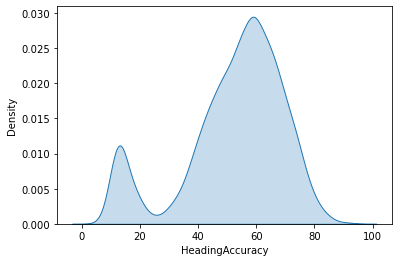

In [36]:
sns.kdeplot(data=df.HeadingAccuracy,fill=True)

# H0 : Height has no impact on heading accuracy

# H1 : Height has  impact on heading accuracy

## The test will be carried out with 95% confidence interval and 5% level of significance.

In [40]:
df.Height.unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9"], dtype=object)

In [ ]:
heightgrps=[]

# Group age data by Height
groups = df.groupby("Height").groups

# Extract individual groups
for i in df.Height.unique():
    heightgrps.append(df.HeadingAccuracy[groups[i]])


In [56]:
# Perform the ANOVA
onewayf,p_value=stats.f_oneway(*heightgrps)

In [58]:
print(onewayf,p_value)

25.496001235134166 6.440262279191106e-94


In [57]:
if p_value < 0.05:   
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Height has the impact on heading accuracy

## So the test has given the result that we want to reject the H0 and accept the H1. It means there is impact.

## Here we only know there is impact but we dont know which group in height is responsible for the impact 

## Basically it means which groups in height widely differ from each other

## So in order to find that we want to carry out "post-hoc test" or "tukey test"

group1,group2,meandiff,p-adj,lower,upper,reject
5'1,5'10,16.131,0.9,-19.2401,51.502,False
5'1,5'11,17.1166,0.9,-18.2577,52.4908,False
5'1,5'2,11.4667,0.9,-33.2475,56.1809,False
5'1,5'3,9.5,0.9,-28.682,47.682,False
5'1,5'4,5.7333,0.9,-31.3417,42.8084,False
5'1,5'5,7.6667,0.9,-28.0468,43.3801,False
5'1,5'6,9.3344,0.9,-26.1827,44.8515,False
5'1,5'7,11.546,0.9,-23.8624,46.9543,False
5'1,5'8,12.0874,0.9,-23.3183,47.4931,False
5'1,5'9,13.8721,0.9,-21.5013,49.2455,False


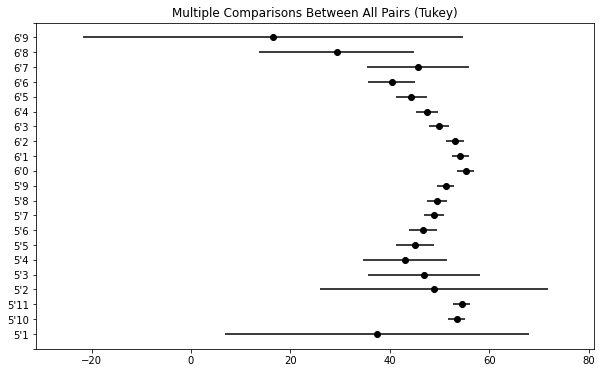

In [150]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey=pairwise_tukeyhsd(endog=df.HeadingAccuracy,     # Data
                        groups=df.Height,   # Groups
                        alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()

## In above summary table if the reject column equals true then it means that particular group1 and group2 has significant difference

# TWO WAY ANOVA

The purpose of a two-way ANOVA is to determine how two factors impact a response variable, and to determine whether or not there is an interaction between the two factors on the response variable.

PROBLEM : A botanist wants to know whether or not plant growth is influenced by sunlight exposure and watering frequency. She plants 30 seeds and lets them grow for two months under different conditions for sunlight exposure and watering frequency. After two months, she records the height of each plant, in inches.

## H0 : Sunlight exposure has no influence on plant growth

## H0 : watering frequency has no influence on plant growth

## H0 : Sunlight exposure and watering frequency has no influence on plant growth

In [157]:
import numpy as np
import pandas as pd

#create data
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})


In [159]:
df.head()

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6


In [158]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


Since the p-values for water and sun are both less than .05, this means that both factors have a statistically significant effect on plant height.

And since the p-value for the interaction effect (.120667) is not less than .05, this tells us that there is no significant interaction effect between sunlight exposure and watering frequency.

## Basically it tells that water frequency has influence , sun exposure has influence and water frequency together do not have influence on plant growth

if we perform post-hoc tests we can determine exactly how different levels of water and sunlight affect plant height.

If sun exposure have effect on plant growth perform tukey test with sun exposure and plant growth and find which levels of sun exposure differ from each other

same for water frequency